In [ ]:
!pip install tensorflow opencv-python matplotlib
!pip list

In [2]:
import tensorflow as tf
import os
import cv2
import stat
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# if using gpus to run ANN, allocates only certain amount of GPU memory towards ANN
gpu_list = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpu_list:
    tf.config.experimental.set_memory_growth(gpu, True)

Found 593 images belonging to 4 classes.


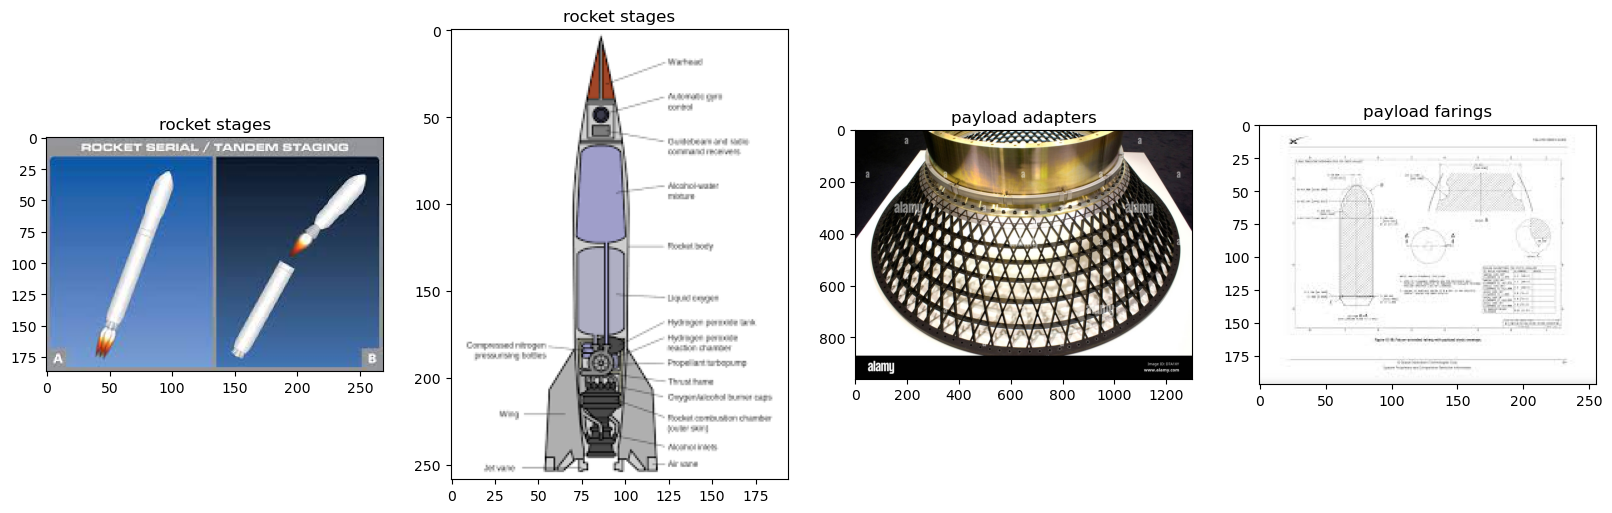

In [3]:
# remove unsupported image files from the directory
img_directory = 'images_debris'
for img_class in os.listdir(img_directory):
    for img in os.listdir(os.path.join(img_directory, img_class)):
        img_path = os.path.join(img_directory, img_class, img)
        img_type = imghdr.what(img_path)
        if img_type not in ['jpeg', 'jpg', 'png']:
            print('Removing image {}'.format(img_path))
            os.chmod(img_path, stat.S_IWRITE)
            os.remove(img_path)

# creating a dataset to print 4 random images
image_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)
data_generator = image_datagen.flow_from_directory(
    img_directory,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True)

# plots the 4 images
class_labels = list(data_generator.class_indices.keys())
plt.figure(figsize = (20, 20))
for i in range(4):
    random_index = np.random.randint(0, len(data_generator.filenames))
    img_path = os.path.join(img_directory, data_generator.filenames[random_index])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 4, i + 1)
    plt.imshow(img)
    plt.title(class_labels[int(data_generator.labels[random_index])])
plt.show()

In [4]:
# ImageDataGenerator creation
image_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

# creating training dataset
train_generator = image_datagen.flow_from_directory(
    img_directory,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = True)

# creating validation dataset
validation_generator = image_datagen.flow_from_directory(
    img_directory,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation',
    shuffle = True)

Found 475 images belonging to 4 classes.
Found 118 images belonging to 4 classes.


In [5]:
# building the model
input_layer = Input(shape = (256, 256, 3))
conv_1 = Conv2D(16, (3, 3), 1, activation = 'relu')(input_layer)
batchnorm_1 = BatchNormalization()(conv_1)
maxpool_1 = MaxPooling2D()(batchnorm_1)
conv_2 = Conv2D(32, (3, 3), 1, activation = 'relu')(maxpool_1)
batchnorm_2 = BatchNormalization()(conv_2)
maxpool_2 = MaxPooling2D()(batchnorm_2)
conv_3 = Conv2D(16, (3, 3), 1, activation = 'relu')(maxpool_2)
batchnorm_3 = BatchNormalization()(conv_3)
maxpool_3 = MaxPooling2D()(batchnorm_3)
flatten = Flatten()(maxpool_3)
dropout_1 = Dropout(0.5)(flatten)
dense1 = Dense(64, activation = 'relu')(dropout_1)
dropout_2 = Dropout(0.5)(dense1)
output_layer = Dense(len(train_generator.class_indices), activation = 'softmax')(dropout_2)

model = Model(inputs = input_layer, outputs = output_layer)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 32)      128

In [6]:
# training the model
trained_model = model.fit(train_generator, epochs = 20, validation_data = validation_generator)

Epoch 1/20


 6/15 [===========>..................] - ETA: 5s - loss: 4.3890 - accuracy: 0.3385

c:\Users\sid32\anaconda3\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - 18s 1s/step - loss: 3.5194 - accuracy: 0.3642 - val_loss: 1.4863 - val_accuracy: 0.2119
Epoch 2/20
15/15 [==============================] - 13s 901ms/step - loss: 1.4286 - accuracy: 0.4989 - val_loss: 1.6375 - val_accuracy: 0.2797
Epoch 3/20
15/15 [==============================] - 13s 854ms/step - loss: 1.0342 - accuracy: 0.5811 - val_loss: 2.5001 - val_accuracy: 0.2712
Epoch 4/20
15/15 [==============================] - 13s 876ms/step - loss: 0.8766 - accuracy: 0.6463 - val_loss: 2.7216 - val_accuracy: 0.3644
Epoch 5/20
15/15 [==============================] - 13s 887ms/step - loss: 0.8074 - accuracy: 0.6884 - val_loss: 2.9368 - val_accuracy: 0.3559
Epoch 6/20
15/15 [==============================] - 13s 900ms/step - loss: 0.7990 - accuracy: 0.7032 - val_loss: 3.0480 - val_accuracy: 0.3644
Epoch 7/20
15/15 [==============================] - 13s 836ms/step - loss: 0.6007 - accuracy: 0.7705 - val_loss: 4.2924 - val_accuracy: 0.2373
Epoch 8/20
15

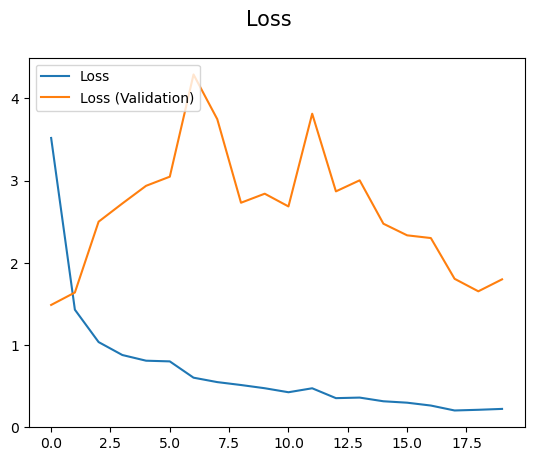

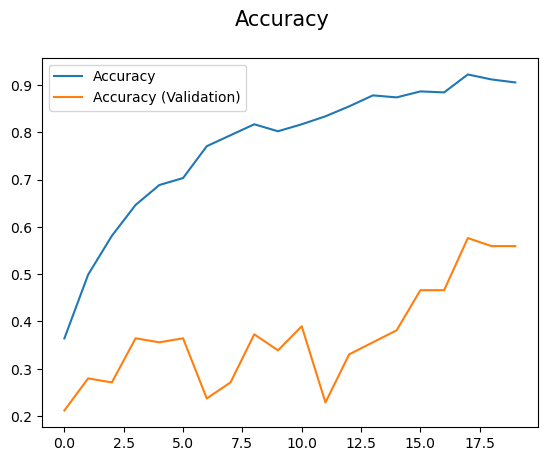

In [7]:
# plotting loss function
fig = plt.figure()
plt.plot(trained_model.history['loss'], label = 'Loss')
plt.plot(trained_model.history['val_loss'], label = 'Loss (Validation)')
fig.suptitle('Loss', fontsize = 15)
plt.legend(loc = "upper left")
plt.show()

# plotting accuracy function
fig = plt.figure()
plt.plot(trained_model.history['accuracy'], label = 'Accuracy')
plt.plot(trained_model.history['val_accuracy'], label = 'Accuracy (Validation)')
fig.suptitle('Accuracy', fontsize = 15)
plt.legend(loc = "upper left")
plt.show()

In [8]:
# evaluating accuracy on the testing set
test_loss, test_accuracy = model.evaluate(validation_generator)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

4/4 [==============================] - 3s 924ms/step - loss: 1.7980 - accuracy: 0.5593
Test Accuracy: 55.93%


1/1 [==============================] - 0s 33ms/step
Predicted class: rcs


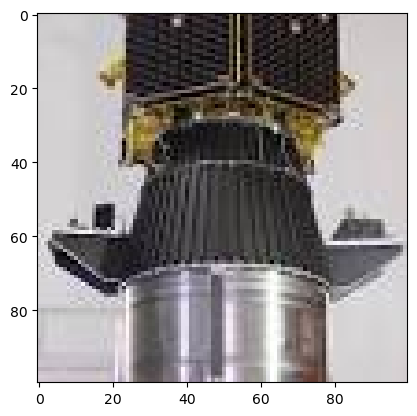

In [12]:
# making predictions on a sample image
test_image_path = "images_debris\payload adapters\image5.jpeg"
test_image = cv2.imread(test_image_path)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
test_image = tf.image.resize(test_image, (256, 256))
test_image = np.expand_dims(test_image / 255, 0)

predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())

print(f"Predicted class: {class_labels[predicted_class]}")